<a href="https://colab.research.google.com/github/ArmstrongVo/ArmstrongVo.github.io/blob/main/AI_W3_BTVN_ANFIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=8565605577349d79179af218207e2276dbbefdfa3291f4cc04ce3d82d1e40956
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
from matplotlib import figure
from skfuzzy.membership.generatemf import gaussmf
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d
import math
a = math.pi
universe0 = np.linspace(-a/2,a/2,61)
universe1 = np.linspace(-a/4,a/4,61)
universe2 = np.linspace(-100,100,61)
alpha = ctrl.Antecedent(universe0,'alpha')
dalpha = ctrl.Antecedent(universe1,'dalpha')
force = ctrl.Consequent(universe2,'force')

name = ['-2','-1','0','1','2']

alpha.automf(names = name)
dalpha.automf(names = name)
force.automf(names = name)

alpha.view()
dalpha.view()
force.view()

rule0 = ctrl.Rule(antecedent=((alpha['-2']&dalpha['-2'])|(alpha['-1']&dalpha['-2'])|
                              (alpha['-2']&dalpha['-1'])|(alpha['-2']&dalpha['0'])|
                              (alpha['-2']&dalpha['1'])|(alpha['-2']&dalpha['2'])|
                              (alpha['-1']&dalpha['2'])),
                  consequent=force['-2'],label='rule -2')

rule1 = ctrl.Rule(antecedent=((alpha['0']&dalpha['-2'])|(alpha['-1']&dalpha['0'])|
                              (alpha['-1']&dalpha['1'])|(alpha['-1']&dalpha['2'])),
                  consequent=force['-1'],label='rule -1')

rule2 = ctrl.Rule(antecedent=(alpha['0']&dalpha['0']),consequent=force['0'],label='rule 0')

rule3 = ctrl.Rule(antecedent=((alpha['1']&dalpha['-2'])|(alpha['-1']&dalpha['-1'])|
                              (alpha['0']&dalpha['-1'])|(alpha['1']&dalpha['-1'])|
                              (alpha['1']&dalpha['0'])|(alpha['0']&dalpha['1'])),
                  consequent=force['1'],label='rule 1')

rule4 = ctrl.Rule(antecedent=((alpha['-2']&dalpha['-2'])|(alpha['-1']&dalpha['-2'])|
                              (alpha['-2']&dalpha['-1'])|(alpha['-2']&dalpha['0'])|
                              (alpha['-2']&dalpha['1'])|(alpha['-2']&dalpha['2'])|
                              (alpha['-1']&dalpha['2'])),
                  consequent=force['-2'],label='rule -2')






system =ctrl.ControlSystem(rules=[rule0,rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run=61*61+1)
upsampled = np.linspace(0,10,61)
x,y =np.meshgrid(upsampled,upsampled)
z = np.zeros_like(x)
for i in range (61):
  for j in range (61):
    sim.input['food']=x[i,j]
    sim.input['service']=y[i,j]
    sim.compute
    sim.output['tip']=z[i,j]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot (111,projection= '3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',antialiased=True,linewidth=0.4)
cset = ax.contourf(x,y,z,Zdir='z',offset =9,cmap ='viridis',anpha =0.5)
cset = ax.contourf(x,y,z,Zdir='x',offset =11,cmap ='viridis',anpha =0.5)
cset = ax.contourf(x,y,z,Zdir='y',offset =11,cmap ='viridis',anpha =0.5)
ax.view_init(30,200)


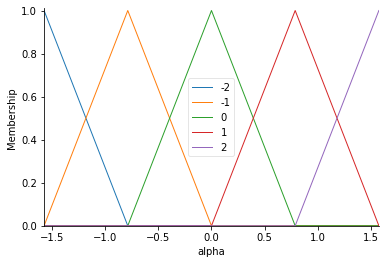

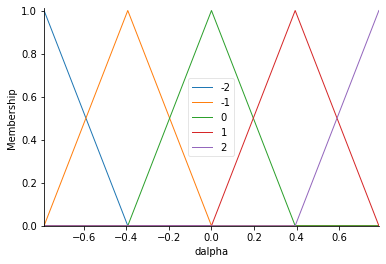

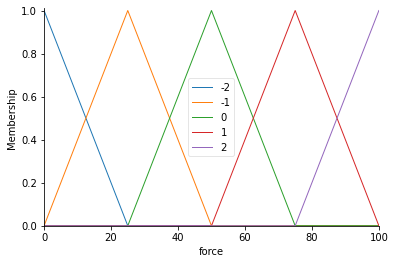

In [2]:
from matplotlib import figure
from skfuzzy.membership.generatemf import gaussmf
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d
import math
a = math.pi
universe0 = np.linspace(-a/2,a/2,61)
universe1 = np.linspace(-a/4,a/4,61)
universe2 = np.linspace(0,100,61)
alpha = ctrl.Antecedent(universe0,'alpha')
dalpha = ctrl.Antecedent(universe1,'dalpha')
force = ctrl.Consequent(universe2,'force')

name = ['-2','-1','0','1','2']

alpha.automf(names = name)
dalpha.automf(names = name)
force.automf(names = name)

alpha.view()
dalpha.view()
force.view()